In [971]:
from PIL import Image, ImageFilter
import math
import numpy as np
import PIL
import random

# 8. Барицентрические координаты
Написать функцию вычисления барицентрических координат для точки с экранными (целочисленными координатами) (x,y) относительно вещественных вершин треугольника (x0, y0), (x1, y1) и (x2, y2).
Они вычисляются по формулам:
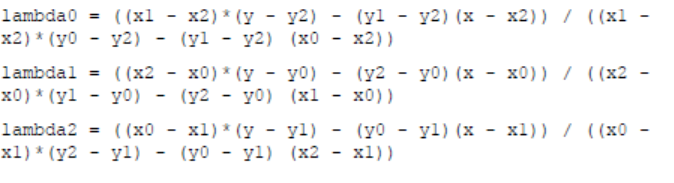
Убедиться, что сумма барицентрических координат
lambda0 + lambda1 + lambda2 = 1.0
Обратите внимание, что координаты (x, y) – экранные, и поэтому целочисленные. В то же время вершины треугольника (x0, y0), (x1, y1) и (x2, y2) – вещественные, округлять их перед вычислениями не надо.
С точки зрения написания и выполнения программы это не оказывает большого влияния, но важно для понимания. Барицентрические координаты в рамках этого курса будут описывать положение пикселя, который вы собираетесь отрисовать, относительно реального треугольника.

In [972]:
def barCoords(triangle, x, y):
    x0 = triangle[0][1]
    x1 = triangle[1][1]
    x2 = triangle[2][1]
    y0 = triangle[0][2]
    y1 = triangle[1][2]
    y2 = triangle[2][2]
    lambda0 = ((x1 - x2)*(y - y2) - (y1 - y2)*(x - x2)) / \
        ((x1 - x2)*(y0 - y2) - (y1 - y2)*(x0 - x2))
    lambda1 = ((x2 - x0)*(y - y0) - (y2 - y0)*(x - x0)) / \
        ((x2 - x0)*(y1 - y0) - (y2 - y0)*(x1 - x0))
    lambda2 = ((x0 - x1)*(y - y1) - (y0 - y1)*(x - x1)) / \
        ((x0 - x1)*(y2 - y1) - (y0 - y1)*(x2 - x1))
    return (lambda0 >= 0. and lambda1 >= 0. and lambda2 >= 0.)

In [973]:
t = np.array([[0, 1, 1], [0, 4, 4], [0, 2, 3]]).astype(np.float32)
t
barCoords(t, 1, 1)

True

# 9.Отрисовка треугольников
Написать функцию отрисовки треугольника с вершинами (x0, y0), (x1, y1) и (x2, y2). Для этого выполнить следующие шаги.
1. Определить ограничивающий прямоугольник: минимальные и максимальные возможные значения координат X и Y. Например:
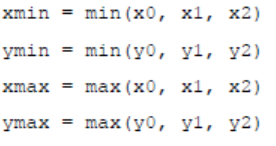
2. Для ограничивающего прямоугольника учесть границы изображения, так, например:

Разумеется, вы можете сделать 1 и 2 пункты одновременно.
3. Для каждого пикселя внутри ограничивающего прямоугольника вычислить барицентрические координаты относительно вершин треугольника.
Если все барицентрические координаты пикселя больше нуля – пиксель рисуется, иначе – переходим к следующему.
Обратите внимание, что рёбра треугольника линиями (как в задании 7) рисовать не надо.

In [974]:
def boundRect(triangle, w, h):
    xleft = min(triangle[0][1], triangle[1][1], triangle[2][1])
    xright = max(triangle[0][1], triangle[1][1], triangle[2][1])
    ytop = min(triangle[0][2], triangle[1][2], triangle[2][2])
    ybot = max(triangle[0][2], triangle[1][2], triangle[2][2])
    if (xleft < 0):
        xleft = 0
    if (ytop < 0):
        ytop = 0
    if (xright > w):
        xright = w
    if (ybot > h):
        ybot = h
    lst = [xleft, xright, ytop, ybot]
    return [int(i) for i in lst]

# 10. Тестирование функции
Протестировать функцию отрисовки треугольника для разных треугольников, в том числе, частично (или полностью) выходящих за пределы изображения.

In [975]:
h = 1000
w = 1000
t = np.array([[0, 100, 300], [0, 40, 20], [0, 260, 30]]).astype(np.float32)
t1 = np.array([[0, -100, 300], [0, 40, 4000], [0, 260, 30]]).astype(np.float32)
t2 = np.array([[0, 500, 500], [0, 400, 400], [0, 550, 400]]).astype(np.float32)
xleft, xright, ytop, ybot = boundRect(t, w, h)
image = np.zeros((h, w, 3), dtype=np.uint8)
for x in range(xleft, xright):
    for y in range(ytop, ybot):
        if(barCoords(t, x, y)):
            image[x, y, 0] = 255
xleft, xright, ytop, ybot = boundRect(t1, w, h)
for x in range(xleft, xright):
    for y in range(ytop, ybot):
        if(barCoords(t1, x, y)):
            image[x, y, 1] = 255
xleft, xright, ytop, ybot = boundRect(t2, w, h)
for x in range(xleft, xright):
    for y in range(ytop, ybot):
        if(barCoords(t2, x, y)):
            image[x, y, 2] = 255
img = PIL.Image.fromarray(image, 'RGB')
img.save("image1.png")

# 11. Отрисовка полигонов трёхмерной модели
Нарисовать все полигоны модели разными цветами (для одного треугольника – один случайный цвет).

In [976]:
def parseV():
    try:
        with open('fox.obj', 'r') as f:
            data = f.readlines()
    except IOError:
        print('IOError')
    lst = [str[2:].split() for str in data[4:] if 'v ' in str]
    lst = [list(map(float, str)) for str in lst]
    return lst


def parseF():
    try:
        with open('fox.obj', 'r') as f:
            data = f.readlines()
    except IOError:
        print('IOError')
    lst = [str[2:].split() for str in data[4:] if 'f ' in str]
    nlst = [j.split('/') for str in lst for j in str]
    lst = [list(map(int, str))[0] for str in nlst]
    return lst

In [987]:
f = parseF()
coords = parseV()
for c in coords:
    c[1] *= -1
    for j in range(3):
        c[j] = c[j] * 5 + 500
triangles = []
for i in range(0, len(f)//3-1):
    triangles.append(
        [coords[f[3*i]-1], coords[f[3*i+1]-1], coords[f[3*i+2]-1]])

In [978]:
image = np.zeros((h, w, 3), dtype=np.uint8)
for i in range(len(triangles)):
    r = random.randint(0, 255)
    g = random.randint(0, 255)
    b = random.randint(0, 255)
    xleft, xright, ytop, ybot = boundRect(triangles[i], w, h)
    for x in range(xleft, xright):
        for y in range(ytop, ybot):
            if(barCoords(triangles[i], x, y)):
                image[x, y] = [r, g, b]
img = PIL.Image.fromarray(image, 'RGB')
img.save("image2.png")

# 12. Вычисление нормали к поверхности треугольника
Для каждого треугольника вычислить нормаль к этому треугольнику по формуле:

где (𝑋0,𝑌0,𝑍0), (𝑋1,𝑌1,𝑍1) и (𝑋2,𝑌2,𝑍2) – исходные координаты вершин треугольника (до любых преобразований), а × – векторное произведение.
Координаты нормали могут быть вычислены через определитель:
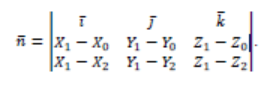
    

In [979]:
def normal(triangle):
    a = [triangle[1][0] - triangle[0][0],
         triangle[1][1] - triangle[0][1],
         triangle[1][2] - triangle[0][2]]
    b = [triangle[1][0] - triangle[2][0],
         triangle[1][1] - triangle[2][1],
         triangle[1][2] - triangle[2][2]]
    return np.cross(a, b)

In [980]:
normals = np.ndarray((len(triangles), 3), dtype=float)
for i in range(len(triangles)):
    normals[i] = normal(triangles[i])

In [981]:
print(normals)

[[ 2.69501557e+02  7.75270817e+02 -3.70520968e+02]
 [ 1.87770727e+02  8.25054333e+02 -8.41085899e+01]
 [ 3.99655863e+02 -7.66937126e+01  2.77222195e+02]
 ...
 [ 4.21465012e+02 -2.38142992e+01 -1.08139531e+02]
 [ 1.47449107e+02 -8.33071305e+00 -3.78331673e+01]
 [ 4.69417483e-01 -2.03140543e-02  8.87957821e+01]]


# 13. Отсечение нелицевых граней
Для каждого треугольника определить косинус угла падения направленного света (считать направление света равным 𝑙̅=[0,0,1]) через нормализованное скалярное произведение 〈𝑛̅,𝑙̅〉‖𝑛̅‖∙‖𝑙̅‖.
Изменить цикл отрисовки полигонов таким образом, чтобы отрисовывались только полигоны с 〈𝑛̅,𝑙̅〉‖𝑛̅‖∙‖𝑙̅‖<0.

In [982]:
L = [-1, 0, 0]
cos = np.zeros(len(normals), dtype=float)
for i in range(len(normals)):
    cos[i] = np.dot(normals[i], L) / \
        (np.linalg.norm(normals[i])*np.linalg.norm(L))

In [983]:
image = np.zeros((h, w, 3), dtype=np.uint8)
for i in range(len(triangles)):
    if(cos[i] < 0):
        r = random.randint(0, 255)
        g = random.randint(0, 255)
        b = random.randint(0, 255)
        xleft, xright, ytop, ybot = boundRect(triangles[i], w, h)
        for x in range(xleft, xright):
            for y in range(ytop, ybot):
                if(barCoords(triangles[i], x, y)):
                    image[x, y] = [r, g, b]
img = PIL.Image.fromarray(image, 'RGB')
img.save("image3.png")

# 14. Базовое освещение
Отрисовку полигонов выполнять не случайным цветом, а пропорциональным косинусу угла между 𝑛̅ и 𝑙̅, например (255∗〈𝑛̅,𝑙̅〉‖𝑛̅‖∙‖𝑙̅‖,0,0).

In [984]:
image = np.zeros((h, w, 3), dtype=np.uint8)
for i in range(len(triangles)):
    if(cos[i] < 0):
        r = 0
        g = -255 * cos[i]
        b = 0
        xleft, xright, ytop, ybot = boundRect(triangles[i], w, h)
        for x in range(xleft, xright):
            for y in range(ytop, ybot):
                if(barCoords(triangles[i], x, y)):
                    image[x, y] = [r, g, b]
img = PIL.Image.fromarray(image, 'RGB')
img.save("image4.png")

# 15. z-буфер
При отрисовке полигонов проверять перекрытие полигонов с использованием z-буфера.
z-буфер – это матрица из вещественных значений по размеру совпадающая с изображением. Все элементы z-буфера изначально инициализируются некоторым достаточно большим значением.
При отрисовке для каждой точки выполняется следующая проверка:
1. Вычисляются барицентрические координаты (𝜆0, 𝜆1, 𝜆2).
2. Если все барицентрические координаты больше нуля, вычисляем z-координату исходного полигона через исходные z-координаты вершин этого полигона:
    𝑧̂= 𝜆0𝑧0+𝜆1𝑧1+𝜆2𝑧2.
3. Если вычисленное значение координаты 𝑧̂ больше координаты z-буфера для текущего пикселя, пропускаем точку.
4. Если вычисленное значение координаты 𝑧̂ меньше координаты z-буфера для текущего пикселя, отрисовываем этот пиксель, а соответствующему элементу z-буфера присваиваем значение 𝑧̂.

In [985]:
def barCoords(triangle, x, y):
    x0 = triangle[0][1]
    x1 = triangle[1][1]
    x2 = triangle[2][1]
    y0 = triangle[0][2]
    y1 = triangle[1][2]
    y2 = triangle[2][2]
    lambda0 = ((x1 - x2)*(y - y2) - (y1 - y2)*(x - x2)) / \
        ((x1 - x2)*(y0 - y2) - (y1 - y2)*(x0 - x2))
    lambda1 = ((x2 - x0)*(y - y0) - (y2 - y0)*(x - x0)) / \
        ((x2 - x0)*(y1 - y0) - (y2 - y0)*(x1 - x0))
    lambda2 = ((x0 - x1)*(y - y1) - (y0 - y1)*(x - x1)) / \
        ((x0 - x1)*(y2 - y1) - (y0 - y1)*(x2 - x1))
    return (lambda0 >= 0. and lambda1 >= 0. and lambda2 >= 0.), lambda0, lambda1, lambda2


In [986]:
z = np.full((h, w), np.inf)
image = np.zeros((h, w, 3), dtype=np.uint8)

for i in range(len(triangles)):
    if(cos[i] > 0):
        r = 255 * cos[i]
        g = 255 * cos[i]
        b = 255 * cos[i]
        xleft, xright, ytop, ybot = boundRect(triangles[i], w, h)
        for x in range(xleft, xright):
            for y in range(ytop, ybot):
                checkZero, lambda0, lambda1, lambda2 = barCoords(
                    triangles[i], x, y)
                if(checkZero):
                    _z = lambda0*triangles[i][0][0]+lambda1 * \
                        triangles[i][1][0]+lambda2*triangles[i][2][0]
                    if(_z < z[x][y]):
                        image[x, y] = [r, g, b]
                        z[x][y] = _z

img = PIL.Image.fromarray(image, 'RGB')
img.save("image5.png")